# <center> Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек </center>

Выполнил студент гр. 0303 Болкунов Владислав, вариант 5.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных
аддитивных цепочек для заданного числа, привить навык использования
систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

#### Аддитивная цепочка для натурального числа n
-- такая последовательность натуральных чисел : 
$$\{a\}_r = \{1 = a_0, a_1, ... , a_r = n\}$$
где $$\forall i \in [0...r] : a_i = a_j + a_k, k \leq j \leq i$$

#### Функции для анализа и построения аддитивных цепочек
$l(n) = r$ - количество операций для построения цепочки (как для минимальной, так и для конкретных алгоритмов)

$\lambda(n) = \lfloor{ log_2(n) }\rfloor$ - (длина бинарной записи $n$) - 1

$\nu(n)$ - вес Хэмминга бинарной записи (количество единиц в бинарной записи)

#### Свойства аддитивных цеочек
- $1 = a_0 < a_1 < ... < a_{n-1} < a_n = n$
- $\exists a_j = a_i \implies a_j \notin \{a\}_r$
- пара чисел $(j, k) : 0 \leq k \leq j < i$ называется $i-$ым шаг
- $\exists$ неколько пар $(j,k) \implies$ взять пару с максимальным $j$ 
#####  Теорема
- Если аддитивная цепочка включает d удвоений и f = r - d неудвоений, то:
$$ n \le 2^{d - 1} F_{f + 3}, $$
где $ F_j $ - число фибоначчи.
- Следствие. Если аддитивная цепочка включает f неудвоений и s малых шагов, то:
$$ s \le f \le \frac{s}{1 - lb(\varphi)}, $$
где $ \varphi = \frac{\sqrt{5} + 1}{2} $ - золотое сечение.

#### Шаги при построении цепочек
1. Удвоение $: j = k = i-1$
2. Звёздный шаг $: j = i-1$
3. Малый шаг $: \lambda(a_i) = \lambda(a_{i-1})$

#### Свойства шагов
1. Первый шаг - всегда удвоение
2. Удвоенине - всегда звёздный шаг, но никогда не малый
3. За удвоением всегда следует звёздный шаг
4. $i-$ый шаг не малый $\implies (i+1)-$ый шаг либо малый либо звёздный либо и тот и тот.
5. $(i+1)-$ый шаг ни звёздный ни малый $\implies i-$ый шаг - малый 


### Алгоритмы для возведения числа $x$ в степень $n$
Не трудно заметить, что возведение числа в n степень тоже является аддитивной цепочкой по отношению к степеням $x$, следовательно при построении последовательности возведения в степеь справедливы понятия и функции описанные выше.

#### Бинарный метод "SX"
1. Записать число в двоичной системе $n = (a_{m}...a_{1})_2$
2. Отбросить старшую цифру a_m (т.к. она всегда будет 1) $\implies(a_{m-1}...a_{1}) $
3. Сделать замену в "строке" по правилу 
$$ 
\begin{cases}
    a_i = 1 \implies a_i = {"SX"} \\
    a_i = 0 \implies a_i = {"S"}
\end{cases} 
$$

4. Получается последовательность операций где $"S"$ - возведение в квадрат $"X"$ - умножение на $x$

Минимальная длина цепочки для бинарного метода:
$$ l(n) \leq \lambda(n) + \nu(n) - 1 $$

#### Бинарный метод (алгоритм более удобный для вычислений на компьютере)

In [1]:
def binMeth(n, x):
    N = [n]
    Y = [1]
    Z = [x]
    while N[-1] != 0:
        if N[-1] % 2 == 0:
            Z.append(Z[-1] ** 2)
            Y.append(Y[-1])
        else:
            Y.append(Z[-1] * Y[-1])
            if N[-1] != 1:
                Z.append(Z[-1] ** 2)
            else:
                Z.append(Z[-1])
        N.append(N[-1] >> 1)
        
    return N, Y, Z

#### Пример работы алгоритма:

In [2]:
data = binMeth(273, x)
table(
    columns=[list(range(len(data[0])))] + list(data), 
    header_row=['$i$', '$N_i$', '$Y_i$', '$Z_i$']
)

,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,


#### Метод Множителей
На каждом шаге:

1. $n \notin \mathbb{P} \implies n = p*q : x^n = {(x^p)}^q$, где $q$ - минимальный простой множитель

2. $n \in \mathbb{P} \implies x^n = x^{n-1}*x$

3. $n = 1 \implies x^1 $.

Минимальная длина цепочки для метода множителей:
$$ l(m*n) \leq \lambda(n) + \nu(n) $$

#### m-арный метод (обобщение бинарного метода):

1. Записать n в m-ичной системе счисления:
$$ n = \sum_{j=0}^{t} {d_j m^{t-j}} \,, 0 \le d_j < m $$

2. Построить $x^2, x^3, ..., x^{m-1}$

3. Возвести $ x^{d_0} $ в степень m и умножить на $ x^{d_1} \implies y_1 = x^{d_0 m + d_1} $

4. Возвести $ y_1 $ в степень m и умножаем на $ x^{d_2} \implies y_2 = x^{d_0 m^2 + d_1 m + d_2} $

5. Продолжать, пока не получится $ y_t = x^n $.

Минимальная длина цепочки для m-арного метода ($m = 2^k , n = \sum_{j=0}^{t}m^{t-j}d_j$):
$$ l(n) \leq m - 2 + (k+1)t $$

#### Дерево степеней:

1. $\exists k-$ый уровень дерева. Необходимо построить $(k+1)-$ый уровень.

2. $\forall$ узла n на k-ом уровне слева направо присоединить к нему узлы:
$$\{ n + a_0, n + a_1, n + a_2, ..., n + a_{k-1}, 2n \}$$

3. Не добавлять уже добавленный узел

В итоге для каждого узла $n$ - путь к нему от корня будет являтся его *минимальной* (не всегда) аддитивной цепочкой.

Пример такого дерева:
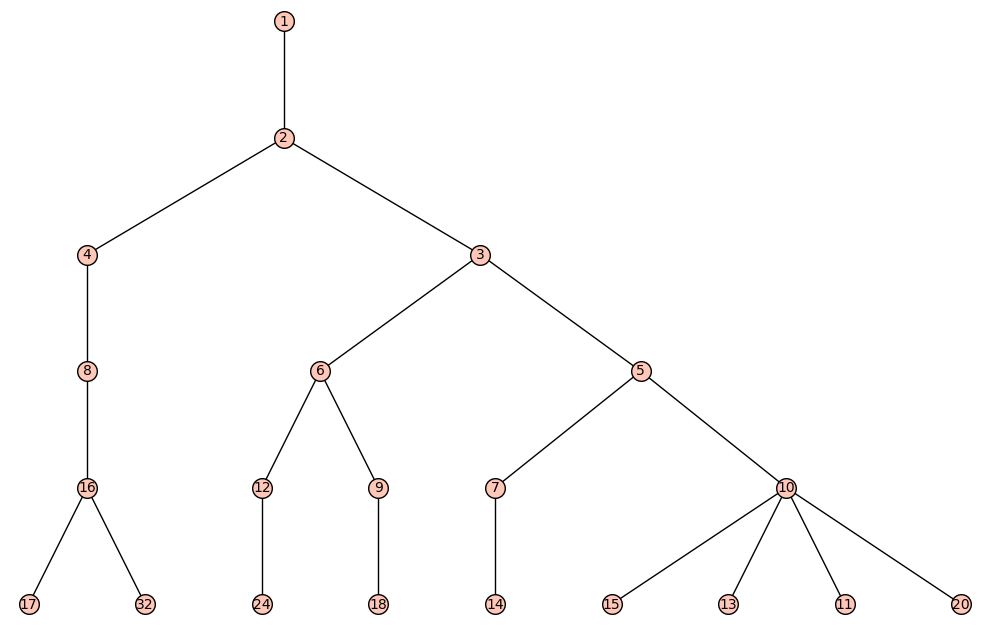

### Приближённые алгоритмы для нахождения аддитивных цепочек

#### 1. Алгоритм Брауэра:
 
Сложность:
$$ l_B(n) = \lambda(n) + \frac{\lambda(n)}{\lambda(\lambda(n))} + O\left( \frac{\lambda(n)\lambda(\lambda(\lambda(n)))}{(\lambda(\lambda(n)))^2} \right) $$

**Алгоритм:**

1. Задается параметр $ k \ge 2 $.

2. Вычисление вспомогательных чисел:
- $ d = 2^k $
- $ q_1, r_1 $ таких, что $ n = q_1 d + r_1 : ( 0 \le r_1 < d $)
- $ q_2, r_2 $ таких, что $ q_1 = q_2 d + r_2 : ( 0 \le r_2 < d $)
- **...**
- Пока не получится $ q_s < d \implies q_{s-1} = q_s d + r_s $ ($ 0 \le r_s < d $)

3. Таким образом n можно записать в виде:
$$ n = 2^k q_1 + r_1 = 2^k(2^k q_2 + r_2) + r_1 = ... = 2^k(2^k(...(2^k q_s + r_s)...)) $$

Остаётся построить цепочки
- Базовую цепочку: $ 1, 2, 3, ..., 2^k - 1 $

- Следующие элементы для $q_s$: $ 2q_s, 2^2q_s, ..., 2^k q_s, 2^k q_s + r_s = q_{s-1} $

- Затем для $q_{s-1}$: $ 2q_{s-1}, 2^2q_{s-1}, ..., 2^k q_{s-1}, 2^k q_{s-1} + r_{s-1} = q_{s-2} $

- **...**
- В итоге для $q_1$: $ 2q_1, 2^2q_1, ..., 2^k q_1, 2^k q_1 + r_1 = n $

*Длина цепочки будет минимизированна для больших n, если взять $ k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n))) $*

#### 2. Алгоритм Яо:

Сложность такая же как у алгоритма Брауэра.

**Алгоритм:**

1. Задается параметр $ k \ge 2 $.

2. n раскладывается в $2^k$-ичную систему счисления:
$$ n = \sum_{i=0}^{j} {a_i 2^{ik}}, \text{ } a_j \ne 0 $$

3. Базовая последовательность $\{ 1, 2, 4, 8, ..., 2^{\lambda(n)} \}$

4. Вычисляются значения функции $d(z)$:
$$ d(z) = \sum_{i: a_i = z} {2^{ik}} $$
Для $\forall z \in \{ 1, 2, 3, ..., 2^k - 1 \} $.

5. $\forall z \in \{ 1, 2, 3, ..., 2^k - 1 \}$ Вычисляются $z*d(z)$.

6. Тогда $n$ раскладывается в:
$$ n = \sum_{z=1}^{2^k - 1} {zd(z)} $$

А аддитивная цепочка для получения n будет выглядеть, как комбинация базовой цепочки и цепочек для получения $z*d(z)$.

### Звездные цепочки:
- Звездная цепочка - аддитивная цепочка состоящая только из звёздных шагов.
- Длина звездной цепочки: $ l^*(n) $.
- Шаг звездной цепочки: $ a_i = a_{i-1} + a_k $ : $\forall k < i $.
- $ l(n) \le l^{*}(n)$.
- Для каждой звезной цепочки (длина $= m-1$) существует вектор индексов:
$$ r = \{ r_1, r_2, ..., r_m \}, $$
длины m - 1, такой, что $ r_i = z: 1 \le z \le i $, $ a_i = a_{i-1} + a_{r_{i-1}} $, $ 2 \le i \le m - 1 $.
- $ r_1 $ всегда = 1. $ r_2 = \{ 1, 2 \} $ и так далее.
- Наибольшая звездная цепочка : $ a = \{ 1, 2, 4, ..., 2^{m-1} \} $, а её вектор индексов $ r = \{ 1, 2, 3, ..., m-1 \} $.
- Наименьшая звездная цепочка : $ a = \{ 1, 2, 3, ..., m-1 \} $, а её вектор индексов $ r = \{ 1, 1, 1, ..., 1 \} $.
- Количество звездных цепочек длины $m-1$ = $A^{*}(m-1) = (m-1)! $.

### Сравнимость векторов индексов:
Даны 2 вектора индексов равной длины $ r = \{r_1, r_2, ..., r_m\} $ и $ \tilde{r} = \{ \tilde{r_1}, \tilde{r_2}, ..., \tilde{r_m} \} $. 
Тогда $ r \succ \tilde{r} $, если $ r_1 = \tilde{r_1} = 1, r_2 = \tilde{r_2}, ..., r_{i-1} = \tilde{r_{i-1}} $, и $ r_i > \tilde{r_i} $ (то есть $\nexists r_i < \tilde{r_i}$)

### Алгоритм дробления вектора индексов
- Дано число $n \in \mathbb{N}$. $\implies$ найти минимальную звездную цепочку : $ a_m = n $.
- $\sphericalangle :$ вектор индексов вида:
$$ \{ r_1, r_2, ..., r_q \} \cup \{ p_{q+1}, p_{q+2}, ..., p_m \} $$
Левая часть - фиксированная, а правую - меняющаяся, $\implies$ такиих наборов: $ \frac{m!}{q!} $.  

**Алгоритм:**
1. Выбрать число $ q \in N $ ($q = \frac{m}{2}$).

2. Внешний цикл по длинам цепочек $ \underline{l(n)} \le m \le \overline{l(n)} $. 

3. Внутренний цикл перебора всех $ \{ r_1, r_2, ..., r_q \} $. На каждом шаге при фиксированной части вычисляем $ a_{min} = a_{q+1} + m - q $ и $ a_{max} = a_{q+1}*2^{m-q}$:

    1. $ a_m = n \implies$  задача решена.
    
    2. $ n \notin \{ a_{min}, a_{max} \} \implies$, переход к следующему набору $ \{ r_1, r_2, ..., r_{q-1} \} $.

    3. $ n \in \{ a_{min}, a_{max} \} \implies$, внутренний перебор меняющейся части $ \{ p_{q+1}, p_{q+2}, ..., p_m \} $:

        1. Если обнаруживается $ a_m = n \implies$ задача решена.

        2. Если в цикле таких векторов не оказалось $\implies$ переход к следующей (по введенной упорядоченности) фиксированной части $ \{ r_1, r_2, ..., r_q \} $.

4. Если все наборы фиксированной длины исчерпаны, то увеличивается общая длина цепочки во внешнем цикле.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты
содержательно проинтерпретировать.


## Порядок выполнения работы

1. Вручную (т.е. не реализовывая алгоритм на Sage) построить последовательность вычислений бинарным методом и методом множителей для $𝑥^𝑛$ для $2-3$ значений $𝑛$ (значение $𝑛 > 30$ выбираются студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Брауэра (для нечётных вариантов) и алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $𝑘$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм минимум для $5$ значений $𝑛 > 1000$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить гипотезу Шольца–Брауэра для всех натуральных $1 \leq 𝑛 \leq 12$ на алгоритме дробления вектора индексов. Результаты оформить в виде таблицы. Сделать выводы.

*5. Найти или предложить собственные модификации алгоритмов и
привести описание модификаций. Реализовать модифицированные
алгоритмы и сравнить их мощность.

## Выполнение работы

### 1. Бинарный метод и метод множителей.
$\sphericalangle : n_1 = 273, n_2 = 127$ 

#### Бинарный метод
#####  $n = 273$
1. $273 = 100010001_2$
2. a = (00010001)
3. Замена: a = "SSSSXSSSSX"
4. Итого: $\{x, x^2, x^4, x^8, x^{16}, x^{17}, x^{34}, x^{68}, x^{136}, x^{272}, x^{273} \}, l(n) = 10$ 

#####  $n = 127$
1. $127 = 1111111_2$
2. a = (111111)
3. Замена: a = "SXSXSXSXSXSX"
4. Итого: $\{x, x^2, x^3, x^6, x^7, x^{14}, x^{15}, x^{30}, x^{31}, x^{62}, x^{63}, x^{126}, x^{127}\}, l(n) = 12$


#### Метод множителей
#####  $n = 273$
1. $x^{273} = (x^{91})^{3}$ $|$ $(y^3 = y^2 * y; y^2 = y*y)$
2. $x^{91} = (x^{13})^7$ $|$ $(y^7 = y^6 * y; y^6 = (y^3)^2; y^3 = y^2 * y; y^2 = y*y)$
3. $x^{13} = x^{12} * x$ 
4. $x^{12} = (x^6)^2$ 
5. $x^6 = (x^3)^2$
6. $x^3 = x^2 * x$
7. $x^2 = x*x$
8. Итого: $\{x, x^2, x^3, x^6, x^{12}, x^{13}, x^{26}, x^{39}, x^{78}, x^{91}, x^{182}, x^{273} \}, l(n) = 11$ 

#####  $n = 127$
1. $x^{127} = x^{126} * x$
2. $x^{126} = (x^{63})^2$ $|$ $(y^2 = y*y)$
3. $x^{63} = (x^{21})^3$ $|$ $(y^3 = y^2*y; y^2 = y*y)$
4. $x^{21} = (x^{7})^3$ $|$ $(y^3 = y^2 * y; y^2 = y*y)$
5. $x^{7} = x^6 * x$
6. $x^6 = (x^3)^2$
7. $x^3 = x^2 * x$
8. $x^2 = x*x$
9. Итого: $\{x, x^2, x^3, x^6, x^7, x^{14}, x^{21}, x^{42}, x^{63}, x^{126}, x^{127} \}, l(n) = 10$



#### Вывод
Метод множителей требует примено столько же операций сколько и бинарный, но при некоторых конкретных n может быть перевес в ту или другую сторону.

### 2. Алгоритм Брауэра

In [93]:
def brauer(n, k):
    d = 2 ** k
    # Частные
    Q = [n // d]
    # Остатки
    R = [n % d]
    while Q[-1] >= d:
        Q.append(Q[-1] // d)
        R.append(Q[-1] % d)
    
    base = [1..d-1] # Базовая цепочка
    chain = [] # остальная цепочка
    for q in Q[::-1]:
        for i in [0..k]:
            chain.append(q * 2 ** i)
    chain.append(chain[-1] + R[0])
    return base, chain

#### Пример работы алгоритма для фиксированного числа $n$ с варьированием параметра $k$ (в скобках указан размер с учётом базовой цепочки):

In [94]:
n = 239

chains = []
rng = [2..6]
for k in rng:
    base, chain = brauer(n, k)
    chains.append(f'{len(chain)}({len(chain) + len(base)})')
    show(f'$k={k}: ' + str(base + chain) + '$')

show(
    table(columns=[list(rng)] + [chains], 
    header_row=['$k$', '$l(n)$'])
)    

'$k=2: [1, 2, 3, 3, 6, 12, 14, 28, 56, 59, 118, 236, 239]$'

'$k=3: [1, 2, 3, 4, 5, 6, 7, 3, 6, 12, 24, 29, 58, 116, 232, 239]$'

'$k=4: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 14, 28, 56, 112, 224, 239]$'

'$k=5: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 7, 14, 28, 56, 112, 224, 239]$'

'$k=6: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 3, 6, 12, 24, 48, 96, 192, 239]$'

,
,10(13)
,9(16)
,6(21)
,7(38)
,8(71)


#### Проверка алгоритма на различных $n$ и $k$, сравнение с минимальными цепочками (в скобках указана длина с учётом базовой цепочки)

In [95]:
N = [88, 273, 410, 1203, 10729, 192168, 8010200]
MIN = [8, 10, 11, 13, 17, 21, 27] 
K = [2..8]
chains = []

for i, n in enumerate(N):
    chains.append([n]) # добавляем само число в первый столбец
    for k in K:
        base, chain = brauer(n, k)
        chains[-1].append(f'{len(chain)}({len(chain) + len(base)})')
    chains[-1].append(MIN[i]) # добавляем минимальную длину
        
show(table(rows=chains, header_row=["$n/k$"] + K + ["$l(n)$"]))  

,,,,,,,,
,10(13),9(16),6(21),7(38),8(71),9(136),10(265),
,13(16),9(16),11(26),7(38),8(71),9(136),10(265),
,13(16),9(16),11(26),7(38),8(71),9(136),10(265),
,16(19),13(20),11(26),13(44),8(71),9(136),10(265),
,19(22),17(24),16(31),13(44),15(78),9(136),10(265),
,25(28),21(28),21(36),19(50),15(78),17(144),19(274),
,34(37),29(36),26(41),25(56),22(85),25(152),19(274),


Можно заметить что при удачно выбранном параметре $k$ длина цепочки в алгоритме брауэра приближается к минимальной. Достаточно болшую часть длины аддитивной цепочки составляет базовая цепочка, длина которой очень быстро растёт при увеличении параметра $k$. Однако если предположить что вычисление базовой цепочки достаточно просто произвести, оставшаяся длина цепочки получается даже меньше минимальной аддитивной цепочки.

### 3. Алгоритм дробления вектора индексов

Получение следующего вектора по убыванию (по правилу в теор. положениях)

In [2]:
def nextVec(v, default=1):
    for i in reversed(range(len(v))):
        if v[i] == 1:
            v[i] = i + default
        else:  
            v[i] -= 1
            return v
    return None

Функция получения звёздной цепочки по заданному вектору индексов

In [3]:
def vecToChain(v):
    chain = [1]
    for i in v:
        chain.append(chain[-1] + chain[i - 1])
    return chain

Функции $\lambda(n)$ и $\nu(n)$ для уточнения границ перебора

In [4]:
def lmb(n):
    return len(bin(n)[2:]) - 1

def nu(n):
    return bin(n).count('1')

Сам алгоритм

In [5]:
def vecSplit(n):
    minL = lmb(n)
    maxL = lmb(n) + nu(n) - 1
    # Перебор длины цепочки
    for m in [minL..maxL]:
        q = m // 2
        fixedVec = [1..q]
        # Перебор 'фиксированой' части
        while fixedVec is not None:
            fixedChain = vecToChain(fixedVec)
            amin = fixedChain[-1] + m - q
            amax = fixedChain[-1] * 2 ** (m - q)
            if amin <= n <= amax:
                floatVec = [(q+1)..m]
                # Перебор 'меняющейся' части
                while floatVec is not None:
                    chain = vecToChain(fixedVec + floatVec)
                    if chain[-1] == n:
                        return fixedVec + floatVec, chain
                    elif chain[-1] < n:
                        while floatVec and floatVec[-1] != len(floatVec) + q:
                            floatVec = nextVec(floatVec)
                    else:
                        floatVec = nextVec(floatVec, q + 1)
            fixedVec = nextVec(fixedVec)
            
    return [], []

#### Проверим его на наборе чисел N

In [6]:
N = [1024, 1125, 1424, 1759, 1812, 2048]
MIN = [10, 13, 13, 14, 13, 11]

import time

res = []
times = []
for n in N:
    start = time.time()
    ivec, chain = vecSplit(n)
    res.append((ivec, chain))
    times.append(time.time() - start)
    show(f'number: ${n}$, time: ${times[-1]} s.$')
    

'number: $1024$, time: $0.07046675682067871 s.$'

'number: $1125$, time: $29.906420946121216 s.$'

'number: $1424$, time: $2.2918360233306885 s.$'

'number: $1759$, time: $128.4556107521057 s.$'

'number: $1812$, time: $2.2241268157958984 s.$'

'number: $2048$, time: $0.00012230873107910156 s.$'

In [7]:
trows = [[N[i], str(res[i][0]), str(res[i][1]), len(res[i][0]), MIN[i], round(times[i], 5)] for i in range(len(N))]

show(table(
    rows=trows, 
    header_row=["$n$", "$indecies$ $vectors$", "$chains$", "$l^*(n)$", "$l(n)$", "$time(sec)$"]
))  

,,,,,
,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]",,,
,"[1, 2, 1, 4, 5, 6, 7, 8, 9, 10, 10, 9, 4]","[1, 2, 4, 5, 10, 20, 40, 80, 160, 320, 640, 960, 1120, 1125]",,,
,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 5]","[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1280, 1408, 1424]",,,
,"[1, 2, 3, 1, 5, 5, 7, 8, 9, 10, 11, 12, 7, 3]","[1, 2, 4, 8, 9, 18, 27, 54, 108, 216, 432, 864, 1728, 1755, 1759]",,,
,"[1, 2, 3, 4, 3, 4, 7, 8, 9, 10, 11, 12, 6]","[1, 2, 4, 8, 16, 20, 28, 56, 112, 224, 448, 896, 1792, 1812]",,,
,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]",,,


Как можно заметить полученные цепочки оказались минимальными так как для $n < 12509$ доказано что $l^*(n) = l(n)$. Сам алгоритм работает значительно медленне приближённых алгоритмов так как является по сути переборным. Время его работы зависит от того насколько минимальная цепочка близка к начальной, в том числе и от того насколько близка её длина к длине начальной.

### 4. Гипотеза Шольца-Брауэра
Сама гипотеза: $l(2^n - 1) \leq l(n) + n - 1$. Доказано, что она справедлива для $1 \leq n \leq 64$ и также для звёздных цепочек.

- Экспериментально требуется подтвердить что справедливо следующее равенство для $1 \leq n \leq 12$: 
$$
l^*(2^n - 1) = l^*(n) + n - 1
$$

In [11]:
import time

Lres = []
Rres = []
times = []
for n in [1..12]:
    start = time.time()
    Lres.append(vecSplit(2 ^ n - 1))
    Rres.append(vecSplit(n))
    
    times.append(time.time() - start)
    show(f'number: ${n}$, time: ${times[-1]} s.$')
    show(f'$l^*(2^n - 1)$ = {len(Lres[-1][0])}, $l^*(n)$ = {len(Rres[-1][0])}, ' +
        f'{len(Lres[-1][0]) == len(Rres[-1][0]) + n - 1}')
    

'number: $1$, time: $0.00015401840209960938 s.$'

'$l^*(2^n - 1)$ = 0, $l^*(n)$ = 0, True'

'number: $2$, time: $0.000446319580078125 s.$'

'$l^*(2^n - 1)$ = 2, $l^*(n)$ = 1, True'

'number: $3$, time: $0.0007295608520507812 s.$'

'$l^*(2^n - 1)$ = 4, $l^*(n)$ = 2, True'

'number: $4$, time: $0.0006589889526367188 s.$'

'$l^*(2^n - 1)$ = 5, $l^*(n)$ = 2, True'

'number: $5$, time: $0.003925800323486328 s.$'

'$l^*(2^n - 1)$ = 7, $l^*(n)$ = 3, True'

'number: $6$, time: $0.00702667236328125 s.$'

'$l^*(2^n - 1)$ = 8, $l^*(n)$ = 3, True'

'number: $7$, time: $0.0791313648223877 s.$'

'$l^*(2^n - 1)$ = 10, $l^*(n)$ = 4, True'

'number: $8$, time: $0.1427614688873291 s.$'

'$l^*(2^n - 1)$ = 10, $l^*(n)$ = 3, True'

'number: $9$, time: $2.6272809505462646 s.$'

'$l^*(2^n - 1)$ = 12, $l^*(n)$ = 4, True'

'number: $10$, time: $46.20486807823181 s.$'

'$l^*(2^n - 1)$ = 13, $l^*(n)$ = 4, True'

'number: $11$, time: $968.4757196903229 s.$'

'$l^*(2^n - 1)$ = 15, $l^*(n)$ = 5, True'

'number: $12$, time: $1679.061520576477 s.$'

'$l^*(2^n - 1)$ = 15, $l^*(n)$ = 4, True'

In [19]:
N = [1..12]
trows = [[N[i], len(Lres[i][0]), len(Rres[i][0]), len(Lres[i][0]) == len(Rres[i][0]) + N[i] - 1, round(times[i], 5)]  for i in range(len(times))]

show(table(
    rows=trows, 
    header_row=["$n$", "$l^*(2^n - 1)$", "$l^*(n)$", "$hypotesis$", "$time(sec)$"]
))  

,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


### 5*. Для алгоритма дробления вектора была применена следующая оптимизация
В цикле перебора меняющейся части, в случае если $a_n < n$, пропускается сразу некоторое количество шагов до ближайшего $a_n \geq n$; что сокращает время перебора почти в два раза.

## Выводы

В ходе работы были исследованы, применены и реализованы с помощью СКА SageMath алгоритмы для быстрого возведения чисел в некоторую степень и алгоритмы построения аддитивных цепочек. А именно:
- бинарный метод и метод множителей для возведения $x$ в степень $n$
- алгоритм Брауэра, который является приближённым и позволяет строить аддитивную цепочку (не гарантируется что минимальную) за оптимальное время.
- алгоритм дробления вектора индексов, который является переборным и позволяет получить минимальную звёздную цепочку.

- также была проверена гипотеза Шольца-Брауэра для чисел $1 \leq n \leq 12$.